In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os.path as op
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from dipy.core.geometry import decompose_matrix

In [4]:
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)

from dipy.viz import regtools

In [5]:
import registration as reg

In [6]:
data_dti = '/data/mri/data/affine/DTI-00-T1/'
data_t2 = '/data/mri/data/affine/T2-T1/'

In [7]:
ls /data/mri/data/affine/T2-T1/

IXI012-HH-1211-T1.nii.gz
IXI012-HH-1211-T1_transformed_predict.nii.gz
IXI012-HH-1211-T2_transformed.nii.gz
IXI013-HH-1212-T1.nii.gz
IXI013-HH-1212-T1_transformed_predict.nii.gz
IXI013-HH-1212-T2_transformed.nii.gz
IXI025-Guys-0852-T1.nii.gz
IXI025-Guys-0852-T1_transformed_predict.nii.gz
IXI025-Guys-0852-T2_transformed.nii.gz
IXI034-HH-1260-T1.nii.gz
IXI034-HH-1260-T1_transformed_predict.nii.gz
IXI034-HH-1260-T2_transformed.nii.gz
IXI046-Guys-0824-T1.nii.gz
IXI046-Guys-0824-T1_transformed_predict.nii.gz
IXI046-Guys-0824-T2_transformed.nii.gz
IXI048-HH-1326-T1.nii.gz
IXI048-HH-1326-T1_transformed_predict.nii.gz
IXI048-HH-1326-T2_transformed.nii.gz
IXI049-HH-1358-T1.nii.gz
IXI049-HH-1358-T1_transformed_predict.nii.gz
IXI049-HH-1358-T2_transformed.nii.gz
IXI051-HH-1328-T1.nii.gz
IXI051-HH-1328-T1_transformed_predict.nii.gz
IXI051-HH-1328-T2_transformed.nii.gz
IXI057-HH-1342-T1.nii.gz
IXI057-HH-1342-T1_transformed_predict.nii.gz
IXI057-HH-1342-T2_transformed.nii.gz
IXI059-HH-1284-T1.nii.gz


In [8]:
ls /data/mri/data/affine/DTI-00-T1/

IXI012-HH-1211-DTI-00_transformed.nii.gz
IXI012-HH-1211-T1.nii.gz
IXI012-HH-1211-T1_transformed_predict.nii.gz
IXI013-HH-1212-DTI-00_transformed.nii.gz
IXI013-HH-1212-T1.nii.gz
IXI013-HH-1212-T1_transformed_predict.nii.gz
IXI025-Guys-0852-DTI-00_transformed.nii.gz
IXI025-Guys-0852-T1.nii.gz
IXI025-Guys-0852-T1_transformed_predict.nii.gz
IXI034-HH-1260-DTI-00_transformed.nii.gz
IXI034-HH-1260-T1.nii.gz
IXI034-HH-1260-T1_transformed_predict.nii.gz
IXI046-Guys-0824-DTI-00_transformed.nii.gz
IXI046-Guys-0824-T1.nii.gz
IXI046-Guys-0824-T1_transformed_predict.nii.gz
IXI048-HH-1326-DTI-00_transformed.nii.gz
IXI048-HH-1326-T1.nii.gz
IXI048-HH-1326-T1_transformed_predict.nii.gz
IXI049-HH-1358-DTI-00_transformed.nii.gz
IXI049-HH-1358-T1.nii.gz
IXI049-HH-1358-T1_transformed_predict.nii.gz
IXI051-HH-1328-DTI-00_transformed.nii.gz
IXI051-HH-1328-T1.nii.gz
IXI051-HH-1328-T1_transformed_predict.nii.gz
IXI057-HH-1342-DTI-00_transformed.nii.gz
IXI057-HH-1342-T1.nii.gz
IXI057-HH-1342-T1_transformed_pred

In [9]:
from glob import glob

In [10]:
def compare_registrations(t1_path):
    data_path = op.split(t1_path)[0]
    if tt.find("DTI") > 0:
        source_string = 'DTI-00_transformed.nii.gz'
    elif tt.find("T2") > 0:
        source_string = 'T2_transformed.nii.gz'
    img_target = nib.load(t1_path)
    img_source = nib.load(op.join(data_path, op.split(t1_path)[1].split('T1')[0] + source_string))
    img_pred = nib.load(op.join(data_path,  op.split(t1_path)[1].split('T1')[0]+ 'T1_transformed_predict.nii.gz'))
    data_source = img_source.get_data()
    data_target = img_target.get_data()
    data_pred = img_pred.get_data()
    transformed_source, reg_affine_source = reg.affine_registration(moving=data_target, 
                                                                    static=data_source, 
                                                                    moving_affine=img_target.affine,
                                                                    static_affine=img_source.affine)
    transformed_pred, reg_affine_pred = reg.affine_registration(moving=data_target, 
                                                                static=data_pred, 
                                                                moving_affine=img_target.affine,
                                                                static_affine=img_pred.affine)
    return reg_affine_source, reg_affine_pred

In [11]:
t1s = glob(op.join(data_t2, '*-T1.nii.gz'))

In [12]:
t1s

['/data/mri/data/affine/T2-T1/IXI644-Guys-1121-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI012-HH-1211-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI556-HH-2452-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI396-HH-2115-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI418-Guys-0956-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI495-Guys-1009-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI261-HH-1704-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI246-Guys-0840-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI582-Guys-1127-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI527-HH-2376-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI613-HH-2734-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI598-HH-2606-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI652-Guys-1116-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI308-Guys-0884-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI569-Guys-1101-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI176-HH-1604-T1.nii.gz',
 '/data/mri/data/affine/T2-T1/IXI057-HH-1342-T1.nii.gz',
 '/data/mri/dat

In [13]:
RMS_trans_pred = []
RMS_trans_source = []
RMS_rot_pred = []
RMS_rot_source = []
for tt in t1s:
    reg_affine_source, reg_affine_pred = compare_registrations(tt)
    scale_source, shear_source, angles_source, translate_source, perspective_source = decompose_matrix(reg_affine_source)
    scale_pred, shear_pred, angles_pred, translate_pred, perspective_pred = decompose_matrix(reg_affine_pred)
    this_RMS_trans_source = np.mean(np.abs(translate_source))
    this_RMS_trans_pred = np.mean(np.abs(translate_pred))
    this_RMS_rot_source = np.mean(np.abs(angles_source))
    this_RMS_rot_pred = np.mean(np.abs(angles_pred))
    RMS_trans_pred.append(this_RMS_trans_pred)
    RMS_trans_source.append(this_RMS_trans_source)
    RMS_rot_pred.append(this_RMS_rot_pred)
    RMS_rot_source.append(this_RMS_rot_source)


Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter

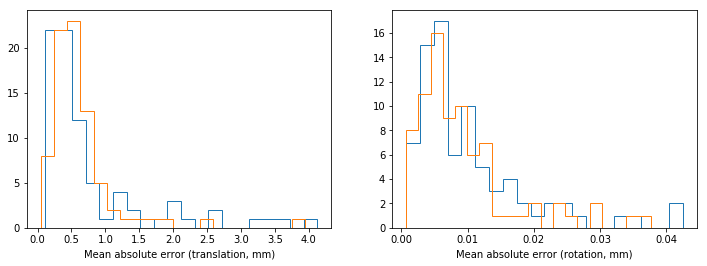

In [14]:
fig, ax = plt.subplots(1,2)
ax[0].hist(RMS_trans_pred, histtype='step', bins=20);
ax[0].hist(RMS_trans_source,  histtype='step', bins=20);
ax[0].set_xlabel('Mean absolute error (translation, mm)')
ax[1].hist(RMS_rot_pred, histtype='step', bins=20);
ax[1].hist(RMS_rot_source,  histtype='step', bins=20);
ax[1].set_xlabel('Mean absolute error (rotation, mm)')
fig.set_size_inches([12,4])

Text(0.5,0,'Mean absolute error (rotation, mm)')

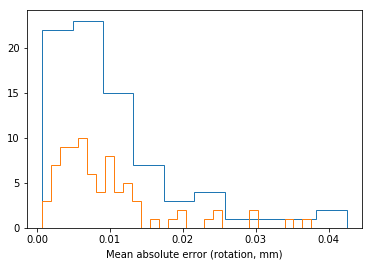

In [15]:
fig, ax = plt.subplots(1)
ax.hist(RMS_rot_pred, histtype='step', bins=10);
ax.hist(RMS_rot_source,  histtype='step', bins=30);
ax.set_xlabel('Mean absolute error (rotation, mm)')

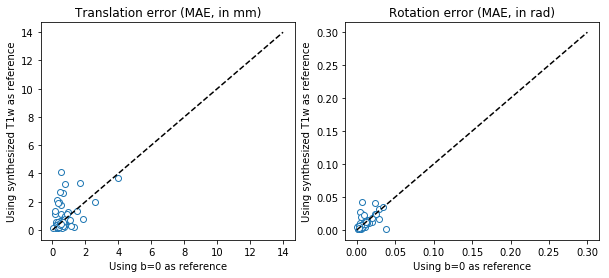

In [16]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(RMS_trans_source, RMS_trans_pred, 'o', markerfacecolor='white')
ax[0].plot([0, 14], [0, 14], 'k--')
ax[0].set_xlabel('Using b=0 as reference')
ax[0].set_ylabel('Using synthesized T1w as reference')
ax[0].set_title('Translation error (MAE, in mm)')
ax[1].plot(RMS_rot_source, RMS_rot_pred, 'o', markerfacecolor='white')
ax[1].plot([0, 0.3], [0, 0.3], 'k--')
ax[1].set_xlabel('Using b=0 as reference')
ax[1].set_ylabel('Using synthesized T1w as reference')
ax[1].set_title('Rotation error (MAE, in rad)')

fig.set_size_inches([10, 4])

(array([  1.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   3.,   0.,   3.,
          0.,   1.,   2.,  11.,  33.,  14.,   4.,   1.,   2.]),
 array([-3.61214118, -3.3754333 , -3.13872541, -2.90201752, -2.66530963,
        -2.42860174, -2.19189386, -1.95518597, -1.71847808, -1.48177019,
        -1.2450623 , -1.00835442, -0.77164653, -0.53493864, -0.29823075,
        -0.06152286,  0.17518502,  0.41189291,  0.6486008 ,  0.88530869,
         1.12201658]),
 <a list of 20 Patch objects>)

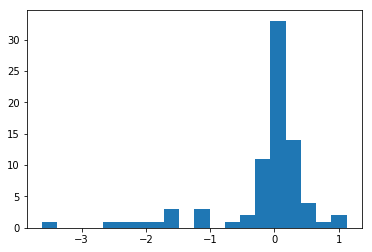

In [17]:
plt.hist(np.array(RMS_trans_source) - np.array(RMS_trans_pred), bins=20)

In [18]:
from scipy.stats import ttest_rel, mannwhitneyu

In [19]:
mannwhitneyu(RMS_trans_pred, RMS_trans_source), mannwhitneyu(RMS_rot_pred, RMS_rot_source)

(MannwhitneyuResult(statistic=2963.0, pvalue=0.29254507605834335),
 MannwhitneyuResult(statistic=3054.0, pvalue=0.40923477715019851))

In [20]:
np.mean(RMS_trans_pred), np.mean(RMS_trans_source)

(0.78364527542601681, 0.63487275257660525)

In [21]:
np.mean(RMS_rot_pred), np.mean(RMS_rot_source)

(0.010315126178546827, 0.0094719144131715626)